In [14]:
#importing the necessary libraries and the file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
file3 = pd.read_csv(r'file:///Users/kaan/Desktop/Data_Marketing_Customer_Analysis_Round3.csv')
file3 

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [15]:
file3.info() #checking the info on the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [16]:
#seperating the data into categorical and numerical
numerics = ['int16', 'int32', 'int64'] 
numerical = file3.select_dtypes(include=numerics)
numerical
categories = ["object"]
categorical = file3.select_dtypes(include = object)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [17]:
#checked if I seperated correctly
categorical.info()
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB
<cla

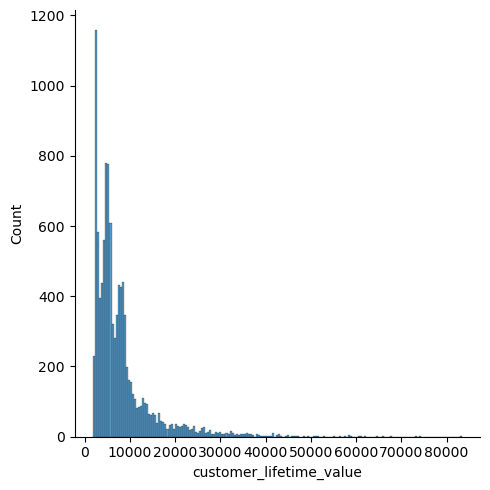

In [18]:
sns.displot(numerical["customer_lifetime_value"])
plt.show()

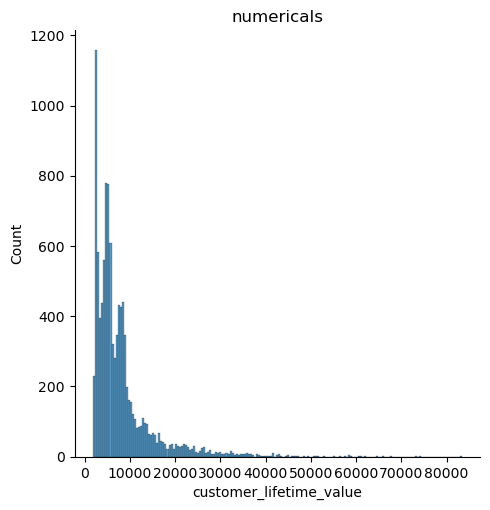

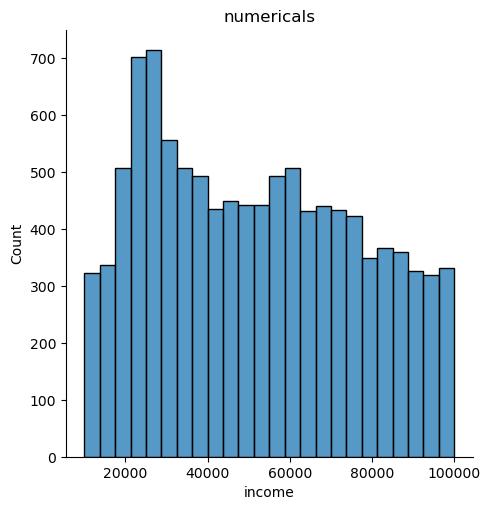

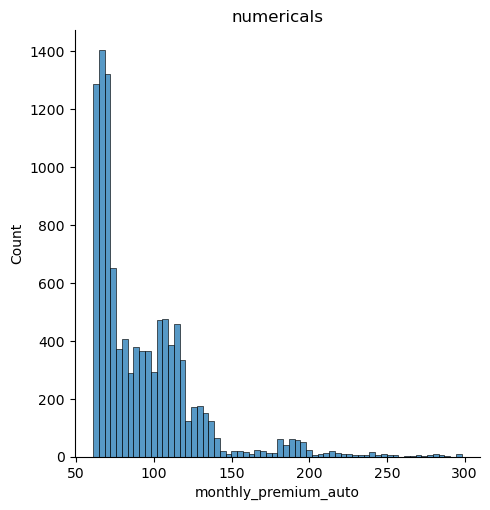

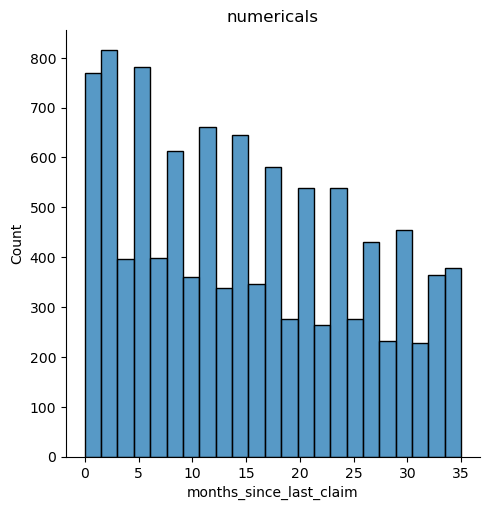

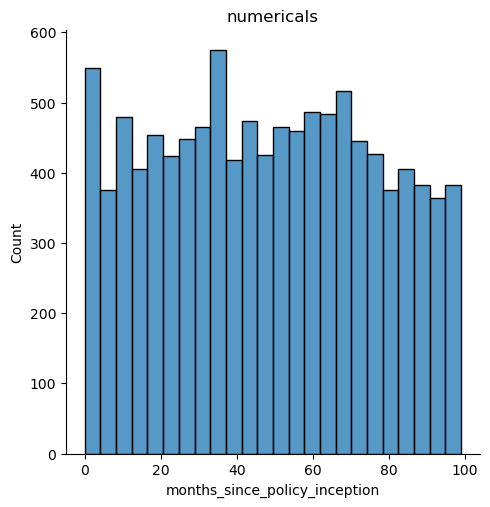

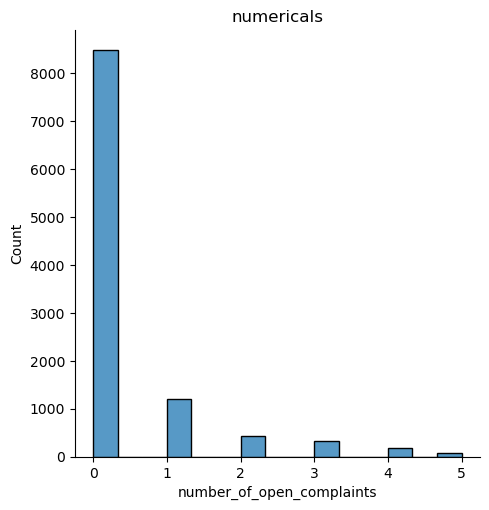

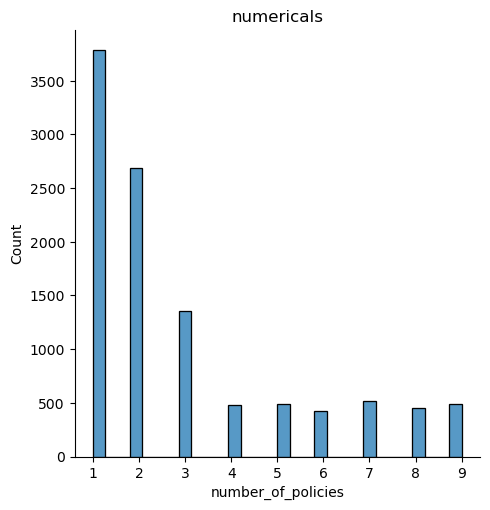

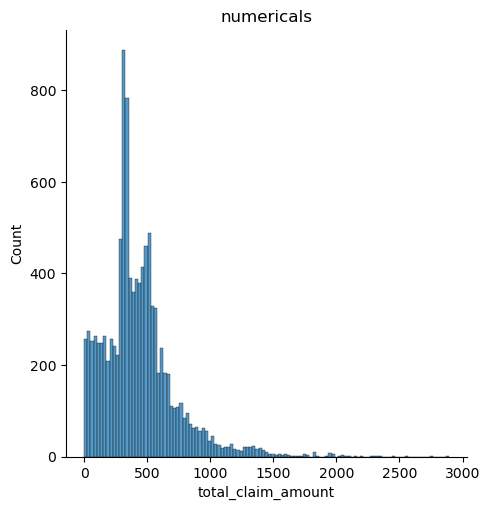

In [19]:
for column in numerical.columns:
    sns.displot(numerical[column])
    plt.title("numericals")
    plt.show()

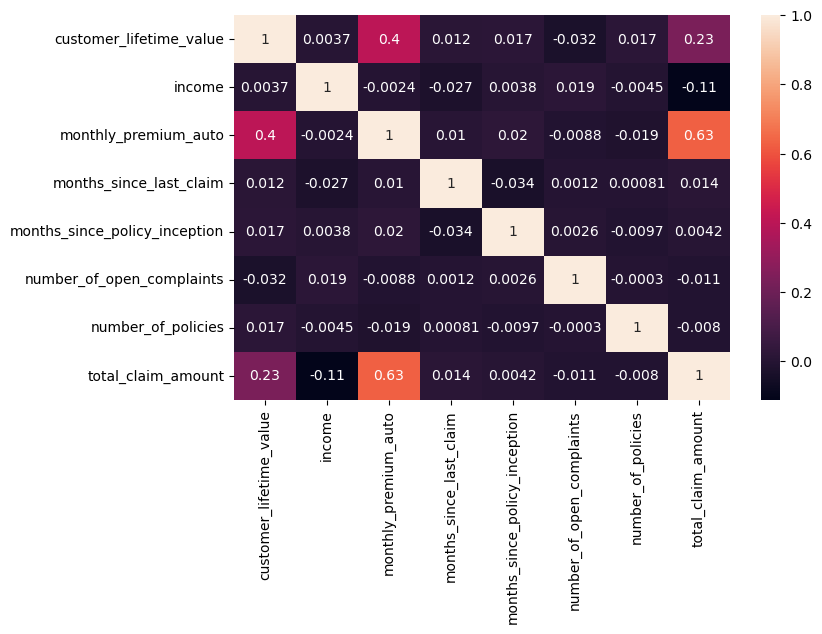

In [20]:
heatmap_numerical = plt.figure(figsize=(8, 5))
sns.heatmap(numerical.corr(), annot=True)
plt.show()

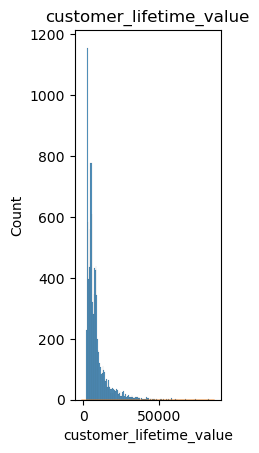

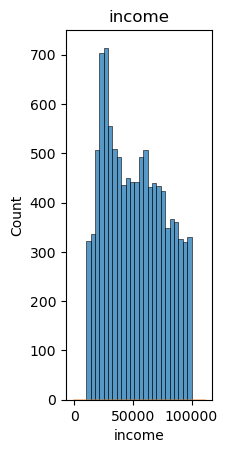

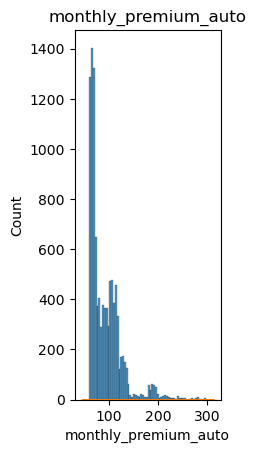

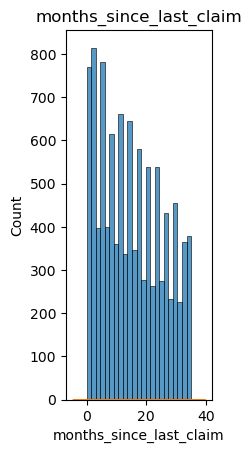

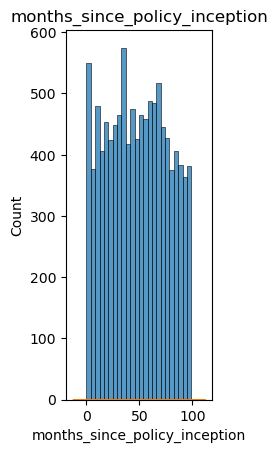

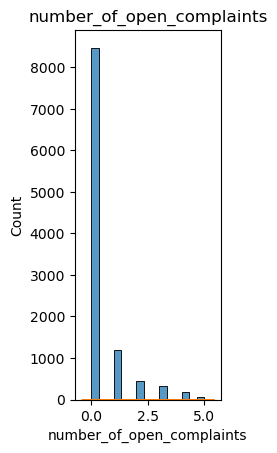

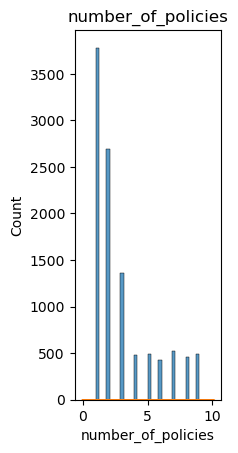

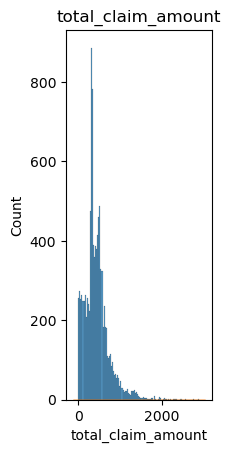

In [21]:
for column in numerical.columns:
    plt.figure()
    plt.subplot(1, 3, 2)
    sns.histplot(numerical[column], kde=False)
    plt.title(column)
    plt.subplot(1, 3, 2)
    sns.kdeplot(numerical[column], fill=True)
    plt.title(column)
    plt.show()

<Axes: xlabel='customer_lifetime_value', ylabel='income'>

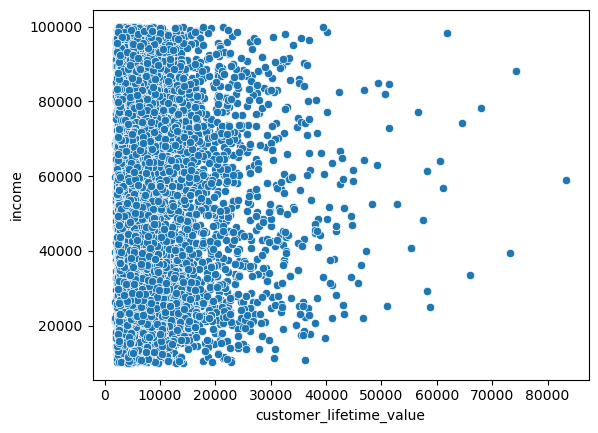

In [22]:
sns.scatterplot(x=numerical.customer_lifetime_value,y=numerical.income)

<Axes: xlabel='monthly_premium_auto', ylabel='income'>

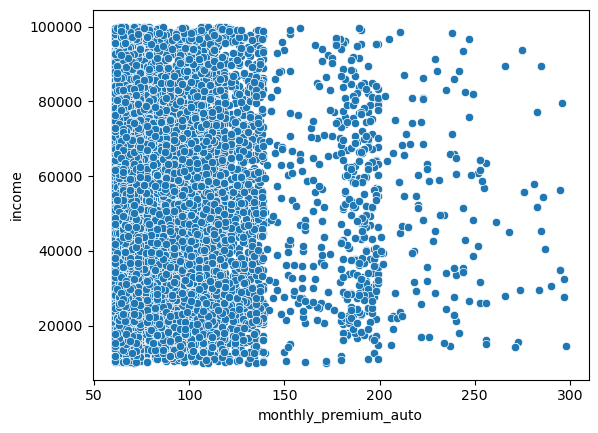

In [23]:
sns.scatterplot(x=numerical.monthly_premium_auto,y=numerical.income)

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>, <Axes: >]],
      dtype=object)

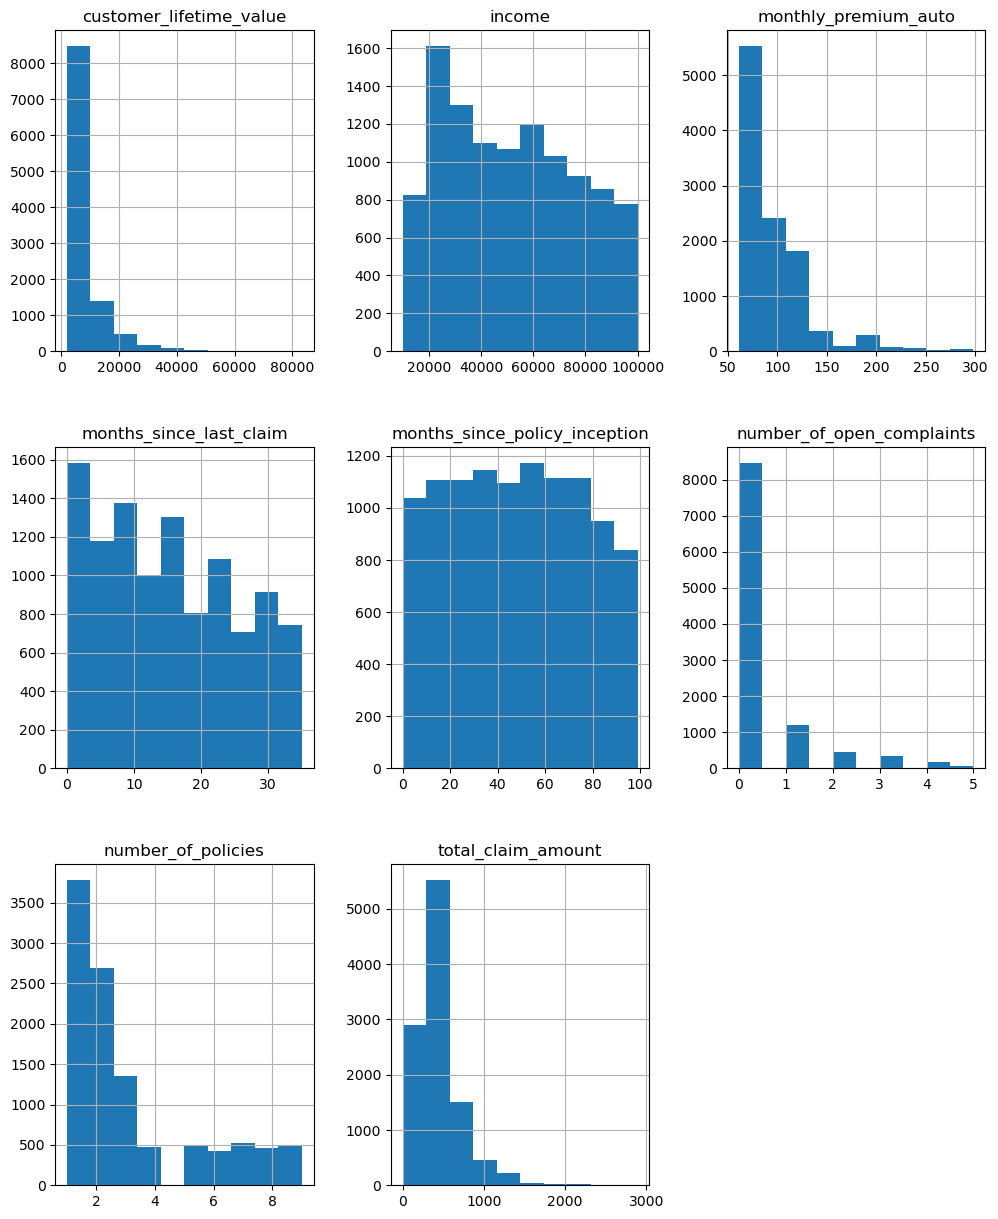

In [24]:
numerical.hist(figsize=(12,15))

### start of activity 4

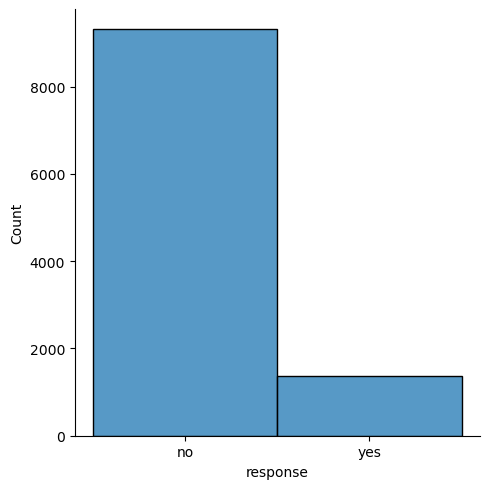

In [27]:
sns.displot(categorical["response"]) #total number of responses
plt.show()

<Axes: xlabel='sales_channel', ylabel='count'>

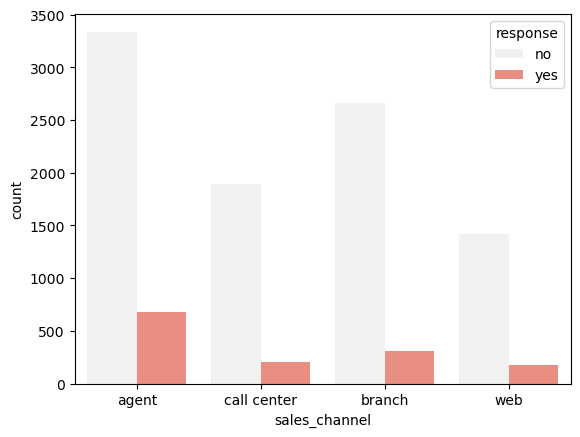

In [44]:
sns.countplot(x = 'sales_channel', #counted the responses and categorized them according to the sales channels
            hue = 'response',
            data = categorical ,color="salmon")

<Axes: xlabel='total_claim_amount', ylabel='count'>

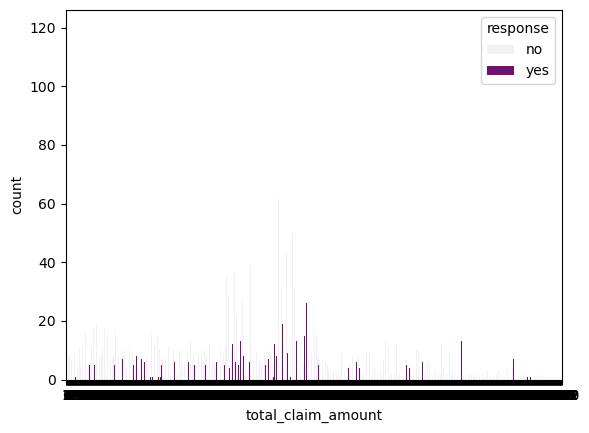

In [64]:
sns.countplot(x = 'total_claim_amount',
           hue = 'response',
           data = file3 ,color="purple")

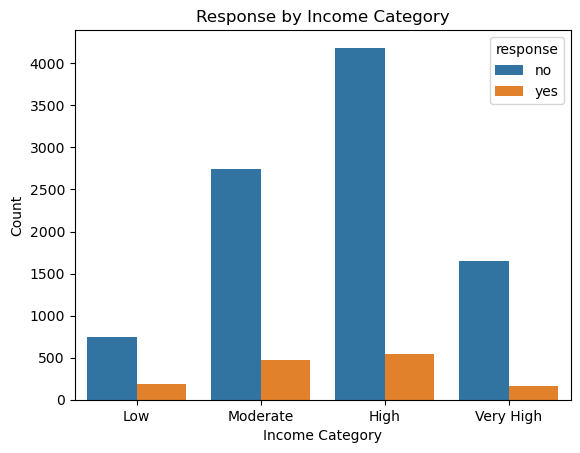

In [61]:
income_bins = [0, 20000, 40000, 80000, float('inf')] #categorized the incomes. 
income_labels = ['Low', 'Moderate', 'High', 'Very High']

file3['income_category'] = pd.cut(file3['income'], bins=income_bins, labels=income_labels) #.cut() for income levels

sns.countplot(data=file3, x='income_category', hue='response')

plt.xlabel('Income Category')#setting the labels and the title
plt.ylabel('Count')
plt.title('Response by Income Category')
plt.show()